<a href="https://colab.research.google.com/github/ronen-halevy/ai-notebooks/blob/main/resize-images/Resizing_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Resizing Images

##Introduction
Here below we introduce image resize AKA image rescale, and illustrate by examples 3 image resize methods.

Images are typically resized to a smaller resolution before being processed by the CNN.
There are various reasons to resize, such as:
- **Network Efficiency**: A smaller resolution input image would require less storage and processing resources. 
- **Uniform Size Requirement**: Normally the networks require all images to be of same size.
- **Constrained Input Size**: Sometimes the network requires a not just a uniform size but contraints a determined input image size.
- **Fit To Downsampling**: In some networks it is required that image dimenssions hould be a multiple of downsize factor. In some networks it is just recommended.

##Resize methods

There are various of resize methods:

- **Strech**: Resizing: Resizes the image to the new bounderies, while not maintaining the original aspect ratio.
- **Crop**: Resizes the image by removing areas outside the new bounderies.
- **Fit**: Resizes the image to the new boundaries without cropping, while maintaining the aspect ratio.



##Image Resize Examples

Examples which follow, demonstrate a resize of a 2592 x 3872 image to 416x416


###Import Required Packages

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO
from PIL import Image
import numpy as np


###Download an image for the example:

Image source:
MarcusObal,
https://commons.wikimedia.org/wiki/File:Colourful_Flower_01.JPG



Text(0.5, 1.0, 'Original image size: 2592 x 3872')

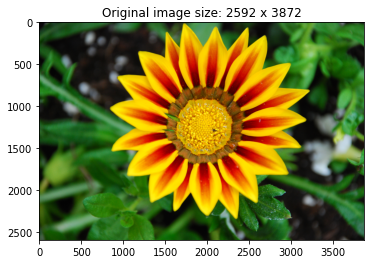

In [14]:

image_url = 'https://upload.wikimedia.org/wikipedia/commons/a/af/Colourful_Flower_01.JPG'

def download_image(image_url):
  response = urlopen(image_url)
  image = response.read()
  image = BytesIO(image)
  image = Image.open(image)
  img = np.array(image)
  return img

source_image = download_image(image_url)/255
plt.imshow(source_image)
plt.title(f'Original image size: {source_image.shape[0]} x {source_image.shape[1]}')


###Target Image Dimenssions:

In [ ]:
ih, iw    = (416,416)

###Example 1: Crop

The original resolution is maintained, while a significant part of the image is cropped off.

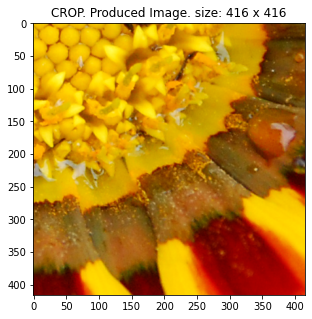

In [18]:
cropped_image = tf.image.crop_to_bounding_box(source_image, source_image.shape[0]//2, source_image.shape[1]//2, ih, iw)
plt.figure(figsize=(5,5))
plt.title(f'Crop. Produced Image. size: {cropped_image.shape[0]} x {cropped_image.shape[1]}')
plt.imshow(cropped_image)

###Strech

The aspect ratio is not maintained

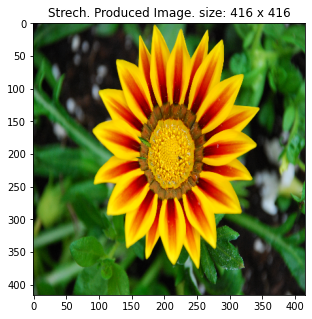

In [19]:
image_streched = tf.image.resize(source_image, (ih, iw ))
plt.figure(figsize=(5,5))
plt.title(f'Strech. Original image. size: {source_image.shape[0]} x {source_image.shape[1]}')
plt.title(f'Strech. Produced Image. size: {image_streched.shape[0]} x {image_streched.shape[1]}')
plt.imshow(image_streched)

###Fit To Size

In this method, the image fits without cropping while maintaining aspect ratio.

The resize scale factor equals min(iw/w, ih/h). 

Accordingly, one of the produced dimenssions will have the exact expected size, while the other will be downsampled to below the expected size.

In this example, the produced image's height will be less than the expected 416.


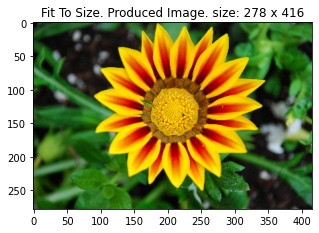

In [20]:
h,  w, _  = source_image.shape
scale = min(iw/w, ih/h)
nh, nw  = int(scale * h), int(scale * w)
image_resized = tf.image.resize(source_image, (nh, nw))
plt.figure(figsize=(5,5))
plt.title(f'Fit To Size. Produced Image. size: {image_resized.shape[0]} x {image_resized.shape[1]}')
plt.imshow(image_resized)

####Fit To Size: Another implementation
Using preserve_aspect_ratio attribute

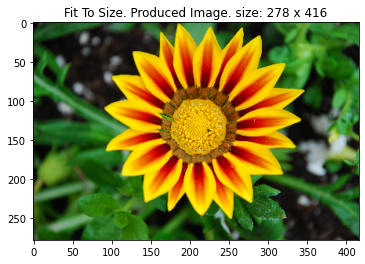

In [22]:
image_fit = tf.image.resize(source_image, (ih, iw ), preserve_aspect_ratio=True)
plt.title(f'Fit To Size. Produced Image. size: {image_resized.shape[0]} x {image_resized.shape[1]}')
plt.imshow(image_fit)

####Next, the produced resized image is padded by grey margins to fit the required height:

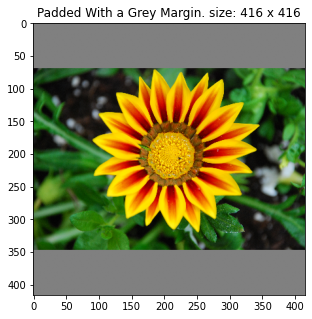

In [21]:
image_paded = np.full(shape=[ih, iw, 3], fill_value=128./255)
dw, dh = (iw - nw) // 2, (ih-nh) // 2
image_paded[dh:nh+dh, dw:nw+dw, :] = image_resized
plt.figure(figsize=(5,5))
plt.title(f'Padded With a Grey Margin. size: {image_paded.shape[0]} x {image_paded.shape[1]}')
plt.imshow(image_paded)